In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
print(y.shape, tx.shape)

print(tx)
len(y)

(10000,) (10000, 2)
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


10000

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - tx @ w
    return (np.transpose(e) @ e) / len(y)
    
compute_loss(y, tx, (1,2))

5388.966731774168

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    losses = np.zeros((len(w0), len(w1)))
    
    min_loss = float("inf")
    min_loss_w = ()
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            loss_w  = (w0[i], w1[j])
            loss = compute_loss(y, tx, loss_w)
            losses[i,j] = loss
            if loss < min_loss:
                min_loss = loss
                min_loss_w = loss_w
                
    print("Minimum Loss: {} for w={}".format(min_loss, min_loss_w))
    
    return losses

grid_search(y, tx, np.arange(50, 100, 0.5), np.arange(0, 20, 0.5));

Minimum Loss: 30.81465546416921 for w=(73.5, 13.5)


Let us play with the grid search demo now!

Minimum Loss: 755.0812253078167 for w=(50.0, 0.0)
Grid Search: loss*=755.0812253078167, w0*=50.0, w1*=0.0, execution time=0.002 seconds


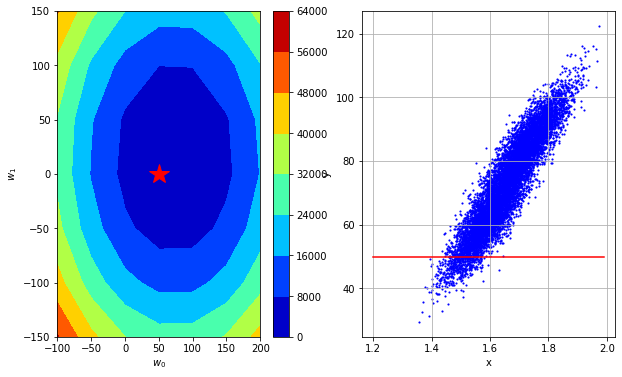

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=7)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and error vector
    # ***************************************************
    e = y - tx @ w
    return -1/len(y) * tx.T @ e



Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = [compute_loss(y, tx, initial_w)]
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w)

        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=4529.270112060007, w0=7.32939220021052, w1=1.3479712434988977
Gradient Descent(1/49): loss=3674.55542815876, w0=13.925845180399989, w1=2.5611453626479075
Gradient Descent(2/49): loss=2982.2365341987506, w0=19.86265286257051, w1=3.6530020698820103
Gradient Descent(3/49): loss=2421.4582300911434, w0=25.205779776523975, w1=4.635673106392709
Gradient Descent(4/49): loss=1967.2278037639815, w0=30.014593999082095, w1=5.520077039252339
Gradient Descent(5/49): loss=1599.3011584389806, w0=34.3425267993844, w1=6.316040578826006
Gradient Descent(6/49): loss=1301.2805757257295, w0=38.23766631965648, w1=7.032407764442306
Gradient Descent(7/49): loss=1059.883903727996, w0=41.74329188790135, w1=7.677138231496976
Gradient Descent(8/49): loss=864.3525994098322, w0=44.89835489932173, w1=8.25739565184618
Gradient Descent(9/49): loss=705.9722429121193, w0=47.737911609600076, w1=8.779627330160462
Gradient Descent(10/49): loss=577.684154148972, w0=50.29351264885059, w1=9.2496358

In [11]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)));

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

# 4 Stochastic gradient descent

In [14]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    e = y - tx @ w
    return -1/len(y) * tx.T @ e


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    ws = [initial_w]
    losses = [compute_loss(y, tx, initial_w)]
    w = initial_w
    for y_batch, tx_batch in batch_iter(y, tx, 5, max_iters):
        gradient = compute_stoch_gradient(y, tx, w)

        w = w - gamma * gradient
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent: loss={l}, w0={w0}, w1={w1}".format(
              l=loss, w0=w[0], w1=w[1]))

    return losses, ws


In [15]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: loss=530.6049242179201, w0=51.30574540147363, w1=9.435798704492283
Stochastic Gradient Descent: loss=75.75675910088235, w0=66.69746902191572, w1=12.26653831584
Stochastic Gradient Descent: loss=34.82042424034894, w0=71.31498610804834, w1=13.11576019924433
Stochastic Gradient Descent: loss=31.136154102900914, w0=72.70024123388814, w1=13.370526764265632
Stochastic Gradient Descent: loss=30.804569790530596, w0=73.11581777164007, w1=13.446956733772023
Stochastic Gradient Descent: loss=30.77472720241726, w0=73.24049073296565, w1=13.469885724623941
Stochastic Gradient Descent: loss=30.77204136948706, w0=73.27789262136332, w1=13.476764421879516
Stochastic Gradient Descent: loss=30.77179964452334, w0=73.28911318788263, w1=13.478828031056189
Stochastic Gradient Descent: loss=30.77177788927661, w0=73.29247935783842, w1=13.47944711380919
Stochastic Gradient Descent: loss=30.771775931304408, w0=73.29348920882515, w1=13.47963283863509
Stochastic Gradient Descent: loss=3

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)